# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [4]:
import pandas as pd 
df = pd.read_csv('/home/roy/Regresion_lineal/data/housing.data', header= None, sep="\s+")
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

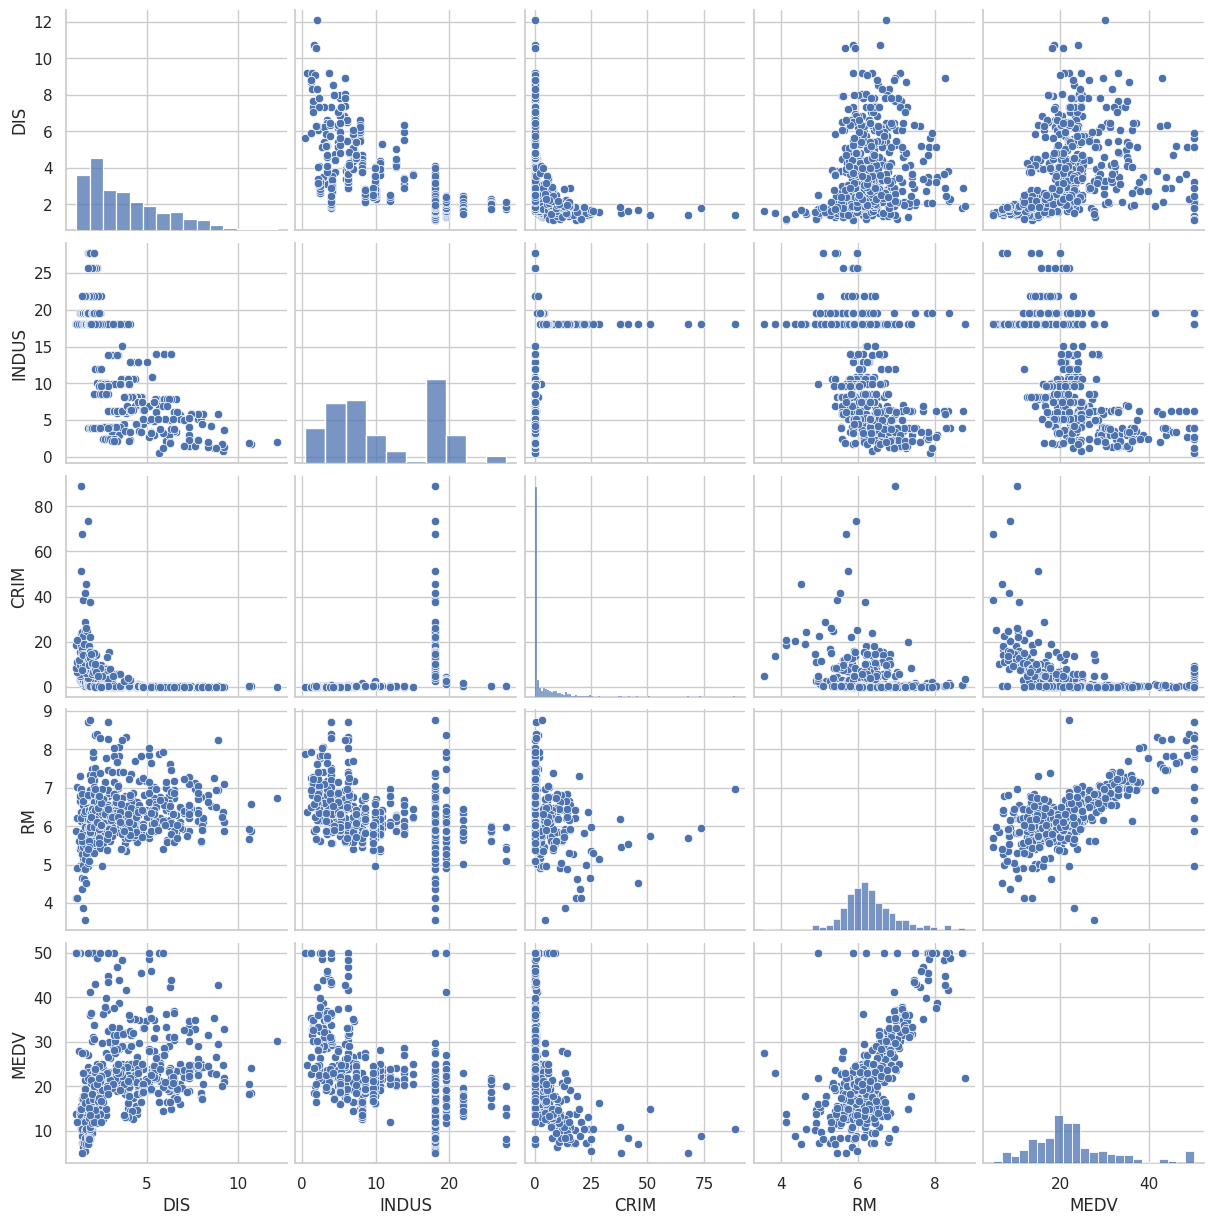

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style='whitegrid', context = 'notebook')
cols = ['DIS','INDUS','CRIM','RM','MEDV']
# distancia de los 5 distritos mas importantes de boston 
# indice de las industrias 
# indice de criminalidad 
# promedio de los cuartos que existen en las casas 
# mediana de los precios 
sns.pairplot(df[cols],height=2.5)
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<AxesSubplot:>

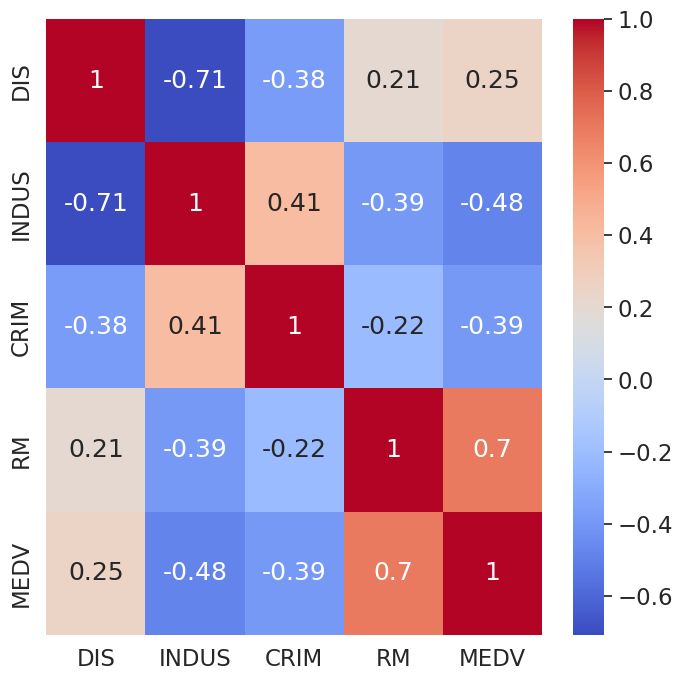

In [12]:
import numpy as np 
plt.figure(figsize=(8, 8))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale= 1.5)
sns.heatmap(cm,cbar=True, annot=True, yticklabels=cols,xticklabels=cols,cmap='coolwarm')

se escogera el promedio de las habitaciones de las casas respecto ala la mediana de los precios 

Que pasa cuando hay más de una variable de correlación?


Primero que todo, la correlación nos dirá el grado de relación lineal entre dos variables. Si la correlación es muy alta, cada una representa muy bien el comportamiento de la otra.
Posteriormente, podemos usar el PCA, que es una técnica que nos permite reducir variables que aportan la misma información deducida de su alta correlación. Gracias a esto, reducimos la dimensionalidad.

## Creando modelo con scikit-learn

In [17]:
from sklearn.preprocessing import StandardScaler # hace un escalamiento de los datos, y permite que el modelo se ajuste mejor a ellos, esto minimiza los errores cuando hay valores atipicos 
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1,1) # variable con la cual quieres predecir y
y = df['MEDV'].values.reshape(-1,1) # necesit un reshape(-1,1)

sc_x = StandardScaler() # hace la estandarizacion de los datos 
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X) # Transforma los datos con la estandarizacion 
y_std = sc_y.fit_transform(y)

slr = LinearRegression() #: Esta línea crea un objeto LinearRegression, que es una clase utilizada para realizar regresión lineal en Python.
slr.fit(X_std,y_std)# Aquí, el objeto slr se ajusta (entrena) a los datos estandarizados X_std y y_std. 

LinearRegression()

una representation grafica de lo que hace .reshape(-1,1)

arr:[2 3 4 5 6 7 8]

la forma es (7,) lo que es solo una dimension 

arr.reshape(-1,1)

[[2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]

 su forma es de (7,1) por lo que se le agrega una dimension

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

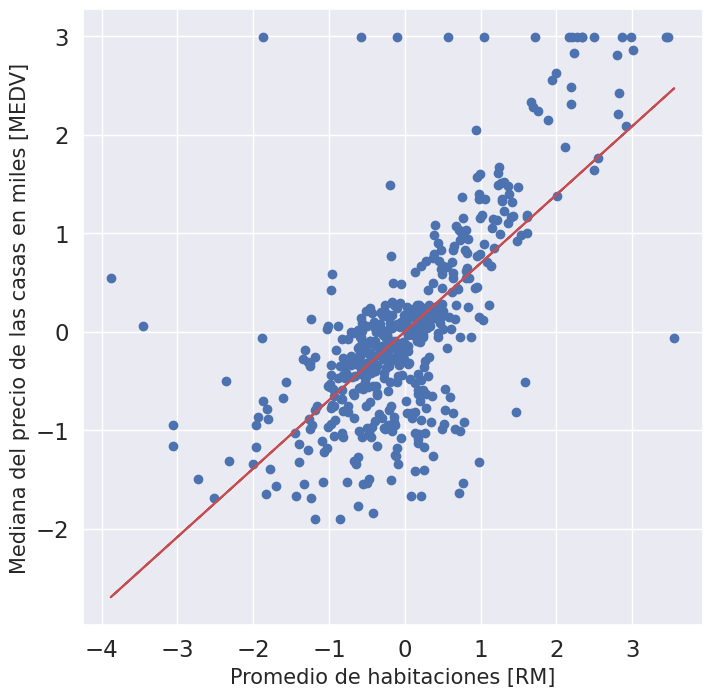

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(X_std,y_std) # nos da el grafico de scatter 
plt.plot(X_std,slr.predict(X_std),color = 'r')# nos da la prediccion de los valores estandarizados 
plt.ylabel('Mediana del precio de las casas en miles [MEDV]',size = 15)
plt.xlabel('Promedio de habitaciones [RM]',size = 15)

## Generando predicción con el modelo

In [38]:
import numpy as np

num_habitaciones = 5 # valor a predecir 

num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))# estandarizacion
precio = sc_y.inverse_transform(slr.predict(num_habitaciones_std))# transformacion inversa para regresar el valore real en vez del valor estandarizado 

print("El precio de una casa con 5 habitaciones en Boston es de ", precio)
slr.predict(num_habitaciones_std) # prediccion en estandarizado

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]


array([[-1.2726238]])

## Que es la regresion linear 

una regresion lineal es una comparacion entre puntos en un plano cartersiano.
Luis nos explica un ejemplo de una regresion lineal el cual esta representada como y= w0 + w1(X) que son los pesos.

En donde explica que:
σLa suma de W0 que es basicamente la distancia que hay desde el punto (0,0) a cualquiera que sea la intercepcion con x (x-int).

σAsi como en cualquier funcion, X es un
Básicamente esto se conoce como w0 el Intercepto y w1 la pendiente de la linea recta.

Y = W0 + W1 * X

![Captura de pantalla 2023-07-18 140308.png](<attachment:Captura de pantalla 2023-07-18 140308.png>)

![regresion lineal-ee1cecd7-cdf8-4e10-87df-d4c086d826af.jpg](<attachment:regresion lineal-ee1cecd7-cdf8-4e10-87df-d4c086d826af.jpg>)
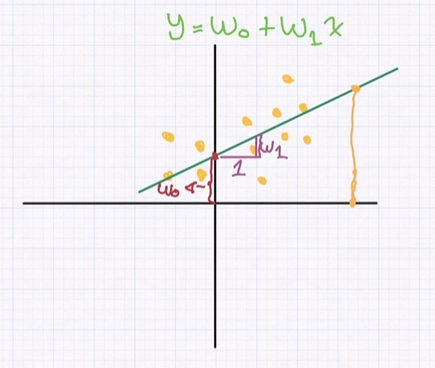
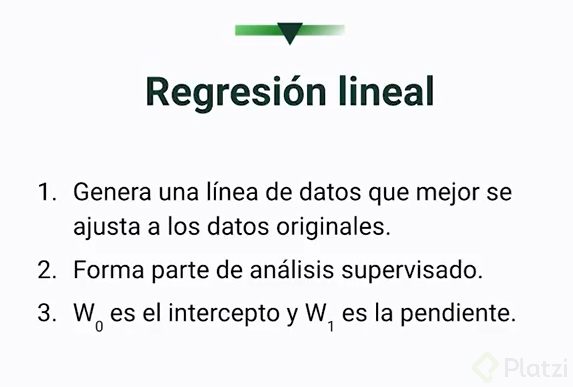

## Cuando utilizar un modelo de regression linear 

* ¿Tengo que predecir una variable numerica? la respuesta debe ser afirmativa.

* ¿Las variables independientes con las que cuento son primordialmente numericas? debe ser afirmativa

* Cuento con una gran cantidad de variables categoricas y/o variables con muchos niveles? no es aconsejable utilizar la regresion lineal en variables categoricas

## Recomendaciones

* Cuando tengas una regresion lineal que no se ajusta bien a los datos, entonces deberiamos de aplicar mas metodos para tener mas referencias.
Si no se ajusta a los datos, vete a algo mas complejo que la regresion linear.

* Reduce las varibles lo mas posible.
+Osea en vez de usar una muestra de 40 , usa mejor las 10 mejores.

* Evita la multicolinealidad. (Cuando las variables son muy relacionadas entre si). Por eejemplo tener libras y kilogramos en una sola, pueda dar probelmas, asi que hay que evitarlo.

* No predigas fuera del dominio de la variante independiente.
 
esto significa que si cuentas con datos que van de x = 0 a x = 20 solo utiliza la regresion lineal para predecir datos que esten dentro de ese rango, ya que si se sale de este rango puede cambiar su comportamiento 

## Función de pérdida y optimización: mínimos cuadrados

### Pasos del algoritmo 

un algoritmo de machine learning siempre lleva un loop 

* Ajustar el modelo: En este paso, creamos un algoritmo que encuentra los mejores "pesos" para nuestras variables con el fin de hacer predicciones precisas. Imagina que estamos tratando de predecir el precio de una casa basándonos en su tamaño y ubicación; el algoritmo ajustará los valores de tamaño y ubicación para obtener la mejor estimación posible del precio.

* Comparar resultados con los reales: Después de ajustar el modelo, comparamos las predicciones del algoritmo con los valores reales de los precios de las casas en nuestro conjunto de datos. Queremos ver qué tan cerca están nuestras predicciones de la realidad para evaluar qué tan bien está funcionando nuestro modelo.

* Se ajustan pesos en el modelo: Si nuestras predicciones no son lo suficientemente precisas, ajustamos los pesos nuevamente en el modelo y volvemos a repetir el proceso de ajuste para mejorar la precisión de nuestras predicciones. Esto se hace iterativamente hasta que estemos satisfechos con el rendimiento del modelo.

* Regreso a paso inicial si no se converge: Si el modelo no converge, es decir, si no logramos obtener resultados satisfactorios a pesar de ajustar los pesos varias veces, volvemos al paso inicial y revisamos si hay problemas en nuestros datos o en el diseño del algoritmo. Este ciclo de ajuste y regreso al inicio se repite hasta que logramos un modelo que produzca predicciones precisas y útiles.

empieza con la linea roja( que es la primera regresion lineal) y se va ajustando paso a paso(lineas grises) hasta llegar ala linea azul la cual es el mejor modelo 

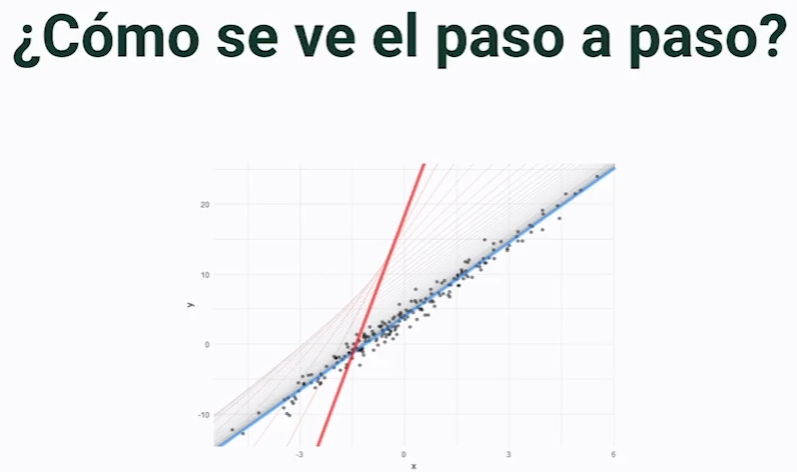

> Es decir, la recta que mejor representa los datos, es aquella en la que la distancia desde los puntos hasta la recta es menor. 

se estan modificando los pesos de la regresion lineal w0 y w1

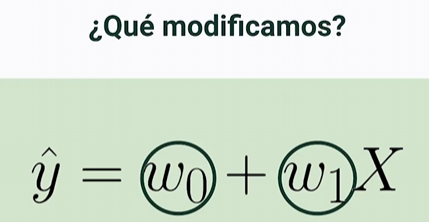

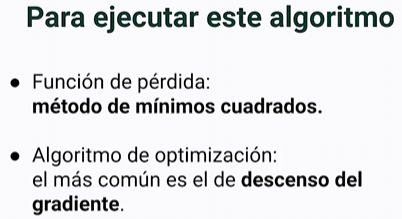

como se puede observar primero se produce una linea predictora(linea azul) la cual con el metodo de minimos cuadrados se empieza a ajustar segun la distancia de los puntos respecto ala linea recta hasta llegar ala mejor linea recta(naranja) 

> Es decir, la recta que mejor representa los datos, es aquella en la que la distancia desde los puntos hasta la recta es menor. 

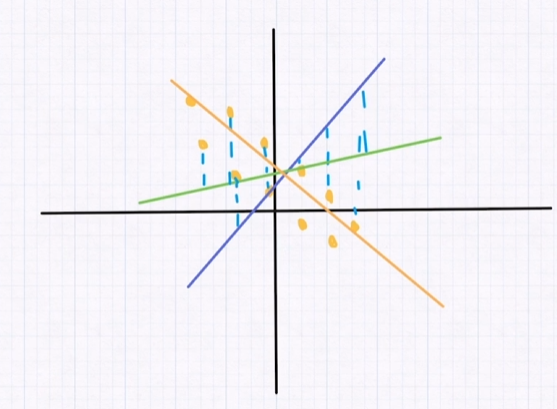

## Evaluando el modelo: R^2 y MSE

estas metricas funcionan para todos los modelos de regresion lineal 

### MSE
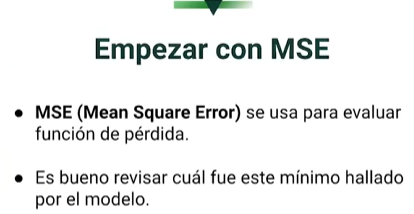

se compara el valore real de tus datos con el valor que se ajusta en el modelo y se empieza a hacer todas las comparaciones al cuadrado si el valor llega a ser muy grande tiende a ser muy malo

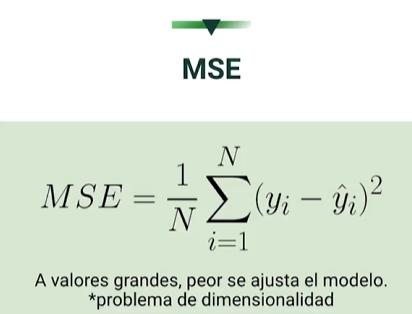

si se hace esto en con datos de 3 dimensiones tiende a ser un valor mas grande que datos de 2 dimensiones 

### R^2

esto te muestra que tan bien se ajusta tu modelo con base en la varianza de los datos 

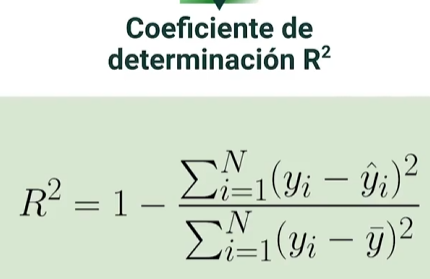

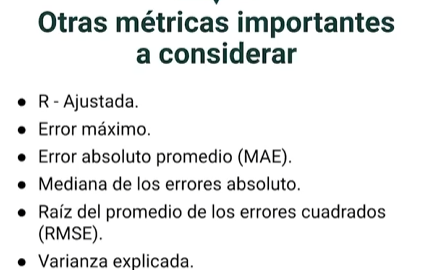

con esto puedes analisar tu modelo con graficas 

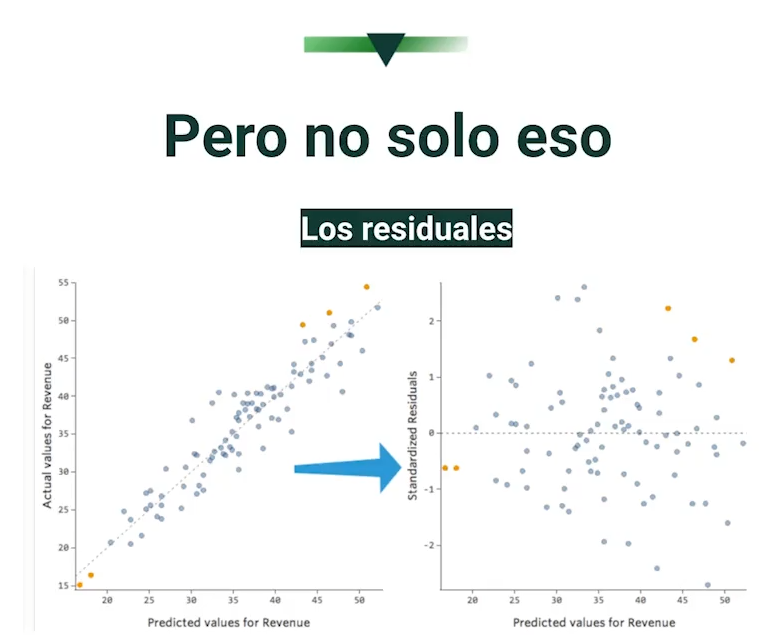

 las gráficas de los residuos en regresión lineal son una herramienta importante para evaluar la calidad del ajuste del modelo y para verificar si se cumplen ciertas suposiciones fundamentales del análisis de regresión. Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo.